In [1]:
cd TileEM/

/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM


In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2
from TileEM_plot_toolbox import *

Populating the interactive namespace from numpy and matplotlib


In [3]:
cd output

/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM/output


In [4]:
objid=2
os.chdir("..")
tiles,indicatorMat= createObjIndicatorMatrix(objid,PRINT=False)
os.chdir(DATA_DIR)

In [10]:
#using the area information in the last row 
tile_area = np.array(indicatorMat[-1])

In [12]:
my_BBG  = pd.read_csv("../../my_ground_truth.csv")

In [13]:
ground_truth_match = my_BBG[my_BBG.object_id==objid]
x_locs,y_locs =  process_raw_locs([ground_truth_match["x_locs"].iloc[0],ground_truth_match["y_locs"].iloc[0]])
BBG = shapely.geometry.Polygon(zip(x_locs,y_locs))
tile_area_ratio = tile_area /BBG.area
tile_subset_idx = tile_area_ratio.argsort()[::-1][:20]

In [22]:
print np.where(tile_area_ratio>0.01)[0]

[1194 1195 1353 1376]


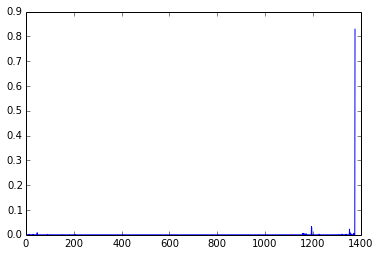

In [17]:
plt.plot(tile_area_ratio)

In [4]:
training_tbl = []
my_BBG  = pd.read_csv("../../my_ground_truth.csv")
import itertools
for objid in tqdm(object_lst):
    #Get Tile information for that object
    worker_ids,worker_precision_lst,worker_recall_lst = compute_worker_PR_obj(objid,return_worker_id=True)
    os.chdir("..")
    tiles,indicatorMat= createObjIndicatorMatrix(objid,PRINT=False)
    os.chdir(DATA_DIR)
    #using the area information in the last row 
    tile_area = np.array(indicatorMat[-1])
    # Loop through all combinations of 20 randomly chosen tiles 
    # tile_subset_idx = np.random.choice(np.arange(len(tiles)),20)
    ground_truth_match = my_BBG[my_BBG.object_id==objid]
    x_locs,y_locs =  process_raw_locs([ground_truth_match["x_locs"].iloc[0],ground_truth_match["y_locs"].iloc[0]])
    BBG = shapely.geometry.Polygon(zip(x_locs,y_locs))
    tile_area_ratio = tile_area/BBG.area
    # Loop through all combinations of 20 top-area tiles 
    tile_subset_idx = tile_area_ratio.argsort()[::-1][:20]
    combs = []
    for i in range(1, len(tile_subset_idx)+1):
        els = [list(x) for x in itertools.combinations(tile_subset_idx, i)]
        combs.extend(els)
    # Compute metric values for 3000 of these tile combinations
    rand_subset = np.random.choice(combs,3000)
    for Tprime in rand_subset:
        p,r =compute_PR(objid,Tprime,tiles)
        gvals=[]
        gammas = pkl.load(open("gfile{}.pkl".format(objid),'r'))
        experiment_idx=0
        # Majority Votes 
        region_votes=[]
        Tareas=[]
        for tidx in Tprime:
            #Number of votes for that tile
            region_votes.append(np.sum(indicatorMat[:-1][:,tidx]))

            if gammas!=[]:
                gvals.append(gammas[experiment_idx][tidx])
            else:
                gvals.append(0)

            Tareas.append(Polygon(tiles[tidx]).area)
        training_tbl.append([objid,Tprime,np.sum(region_votes), np.mean(region_votes),np.sum(gvals),np.mean(gvals),np.sum(Tareas),np.mean(Tareas),p,r])

if pick 10k tiles combo then takes around 3.5 hrs 

300 tiles combo takes about 2 hrs


In [5]:
df = pd.DataFrame(training_tbl,columns=["objid","T prime","Total Votes","Average Votes","Total gamma value","Average gamma value",\
                                        "Total area","Average area","Precision","Recall"])
df = df[df["Total gamma value"]!=0]

In [6]:
df

,objid,T prime,Total Votes,Average Votes,Total gamma value,Average gamma value,Total area,Average area,Precision,Recall
3000,2,"[1376, 47, 1171, 1361, 1226, 1339, 30, 14, 90,...",211,17.583333,4.495928,0.374661,4912.64,409.386667,0.973424,0.836833
3001,2,"[1376, 1194, 1195, 1353, 47, 1371, 1361, 1339,...",242,22.000000,5.493861,0.499442,5356.62,486.965455,0.919924,0.862312
3002,2,"[1194, 1195, 1353, 47, 1357, 1371, 1162, 1171,...",369,26.357143,7.493096,0.535221,727.88,51.991429,0.335645,0.042753
3003,2,"[1376, 1194, 1195, 47, 1371, 1157, 1361, 1339,...",242,20.166667,4.996513,0.416376,5261.84,438.486667,0.913456,0.841099
3004,2,"[1376, 1194, 1195, 1357, 1157, 1226, 1339, 14,...",238,21.636364,4.996350,0.454214,5219.22,474.474545,0.920913,0.841097
3005,2,"[1194, 1195, 47, 1226, 14, 1335]",130,21.666667,3.496453,0.582742,423.92,70.653333,0.050525,0.003748
3006,2,"[1195, 1353, 47, 1357, 1371, 1162, 1171, 1226,...",300,25.000000,6.492376,0.541031,524.44,43.703333,0.442345,0.040596
3007,2,"[1376, 1194, 1195, 47, 1357, 1371, 1162, 1157,...",362,25.857143,7.492435,0.535174,5366.48,383.320000,0.903138,0.848136
3008,2,"[1195, 1357, 1171, 14, 1335, 207]",135,22.500000,2.497380,0.416230,248.92,41.486667,0.216566,0.009433
3009,2,"[1376, 1195, 47, 1171, 1321, 1226, 1339, 30, 90]",201,22.333333,3.994653,0.443850,5029.98,558.886667,0.947700,0.834178


this took about 1.5 hours to run 

In [7]:
df.to_csv("area_based_tile_combo_metric.csv")

# Correlation between variables

In [8]:
correlation = df[df.keys()[2:]].corr('pearson')
correlation

,Total Votes,Average Votes,Total gamma value,Average gamma value,Total area,Average area,Precision,Recall
Total Votes,1.000000,0.834762,0.676957,0.469193,-0.185614,-0.260223,0.523767,0.357841
Average Votes,0.834762,1.000000,0.459549,0.562068,-0.305482,-0.299492,0.566562,0.266823
Total gamma value,0.676957,0.459549,1.000000,0.825904,-0.082587,-0.165414,0.352795,0.269674
Average gamma value,0.469193,0.562068,0.825904,1.000000,-0.200747,-0.195107,0.367446,0.159876
Total area,-0.185614,-0.305482,-0.082587,-0.200747,1.000000,0.954851,-0.243644,0.278558
Average area,-0.260223,-0.299492,-0.165414,-0.195107,0.954851,1.000000,-0.243028,0.244190
Precision,0.523767,0.566562,0.352795,0.367446,-0.243644,-0.243028,1.000000,0.619862
Recall,0.357841,0.266823,0.269674,0.159876,0.278558,0.244190,0.619862,1.000000


<matplotlib.colorbar.Colorbar instance at 0x10e872c68>

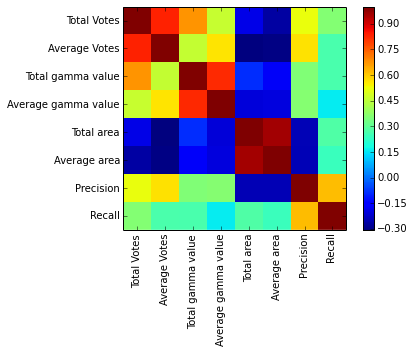

In [10]:
plt.imshow(correlation.as_matrix(),interpolation="None")
ticks=np.arange(0,8)
plt.xticks(ticks, df.keys()[2:], rotation='vertical')
plt.yticks(ticks, df.keys()[2:], rotation='horizontal')
plt.colorbar()

- the obvious things are that:
    - average and sum are correlated
    - identity along diagonal is correlated
- surprisingly, area is only weakly correlated with recall
- Total votes and total gamma values are strongly correlated as we expected
- Both total votes and total gamma values are strongly correlated with recall value

# Regression for ground truth PR

In [38]:
#x_attr = ["Average Votes","Average gamma value","Average area"]
x_attr=df.keys()[2:-2]
print x_attr
y_attr = ["Precision","Recall"]

Index([u'Total Votes', u'Average Votes', u'Total gamma value',
       u'Average gamma value', u'Total area', u'Average area'],
      dtype='object')


In [39]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [40]:
msk = np.random.rand(len(df)) < 0.8
Xtrain = df[x_attr][msk].as_matrix()
Xtest = df[x_attr][~msk].as_matrix()
Ytrain = df[y_attr][msk].as_matrix()
Ytest = df[y_attr][~msk].as_matrix()

In [41]:
regr.fit(Xtrain,Ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:
regr.coef_?

In [49]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(Xtest) - Ytest) ** 2))
print('R^2: %.2f' % regr.score(Xtest, Ytest))

('Coefficients: \n', array([[  3.74315451e-04,   2.64185169e-02,   3.71619685e-02,
         -1.76803614e-01,  -2.12016051e-05,   1.29063572e-04],
       [  1.23249972e-03,   6.50927078e-03,   2.39771618e-02,
         -1.64756958e-01,   1.76179630e-05,   1.11125772e-04]]))
Mean squared error: 0.08
R^2: 0.30


In [43]:
X = df[x_attr].as_matrix()
Y = df[y_attr].as_matrix()

In [52]:
regr.fit(X,Y)
print('Coefficients: \n', regr.coef_)

('Coefficients: \n', array([[  3.74315451e-04,   2.64185169e-02,   3.71619685e-02,
         -1.76803614e-01,  -2.12016051e-05,   1.29063572e-04],
       [  1.23249972e-03,   6.50927078e-03,   2.39771618e-02,
         -1.64756958e-01,   1.76179630e-05,   1.11125772e-04]]))


In [48]:
print np.mean(df["Precision"])
print np.mean(df["Recall"])

0.551665332956
0.353372659919


#### $\therefore$ Average gamma value more important in determining actual PR compared to average area or average votes of the selected tiles 

In [105]:
combined_df = df["Precision"]+df["Recall"]

In [8]:
df.sort(columns=["Precision","Recall"],ascending=False)

,objid,T prime,Total Votes,Average Votes,Total gamma value,Average gamma value,Total area,Average area,Precision,Recall
7369,2,"[1376, 1353, 1371, 1361]",141,35.250000,1.997245,0.499311,4917.88,1229.470000,0.998006,0.858881
9832,2,"[1376, 90, 1335]",72,24.000000,1.497934,0.499311,4753.06,1584.353333,0.997553,0.829719
7388,2,"[1376, 1353, 1371, 1361, 1339, 0]",176,29.333333,2.497696,0.416283,4939.52,823.253333,0.996432,0.861299
9012,2,"[1376, 1357, 1361, 1321, 1226]",172,34.400000,2.496557,0.499311,4828.30,965.660000,0.996389,0.841870
6005,2,"[1376, 1353, 1357, 1361, 1226, 1339, 207]",211,30.142857,2.996692,0.428099,4961.74,708.820000,0.995599,0.864451
6292,2,"[1376, 1353, 1371, 30, 1335]",141,28.200000,1.997408,0.399482,4919.50,983.900000,0.995401,0.856921
8893,2,"[1376, 1353, 1357, 1361, 1226, 90]",175,29.166667,2.995868,0.499311,4950.52,825.086667,0.995064,0.862033
8704,2,"[1376, 1357, 1371, 14, 90, 1335]",143,23.833333,2.995868,0.499311,4843.12,807.186667,0.995034,0.843306
5509,2,"[1376, 1357, 1321, 1226, 1339, 207]",175,29.166667,2.497380,0.416230,4830.72,805.120000,0.995020,0.841135
9293,2,"[1376, 1357, 1371, 1361, 1226, 1339, 90, 0]",210,26.250000,3.496319,0.437040,4877.76,609.720000,0.994903,0.849226


In [9]:
df.sort(columns=["Recall","Precision"],ascending=False)

,objid,T prime,Total Votes,Average Votes,Total gamma value,Average gamma value,Total area,Average area,Precision,Recall
6326,2,"[1376, 1194, 1195, 1353, 1357, 1371, 1162, 136...",402,33.500000,6.992961,0.582747,5389.04,449.086667,0.926462,0.873697
9797,2,"[1376, 1194, 1195, 1353, 1357, 1371, 1162, 117...",439,27.437500,7.993547,0.499597,5438.92,339.932500,0.917965,0.873697
6064,2,"[1376, 1194, 1195, 1353, 47, 1357, 1371, 1361,...",380,23.750000,6.993758,0.437110,5441.92,340.120000,0.917459,0.873697
9487,2,"[1376, 1194, 1195, 1353, 1357, 1371, 1162, 117...",437,25.705882,8.492198,0.499541,5457.54,321.031765,0.914833,0.873697
8730,2,"[1376, 1194, 1195, 1353, 47, 1357, 1371, 1162,...",465,29.062500,8.492035,0.530752,5502.52,343.907500,0.907355,0.873697
9464,2,"[1376, 1195, 1353, 47, 1357, 1371, 1162, 1171,...",410,24.117647,7.991297,0.470076,5314.54,312.620000,0.939050,0.873325
9617,2,"[1376, 1195, 1353, 1357, 1371, 1361, 1321, 122...",346,28.833333,4.994100,0.416175,5184.64,432.053333,0.962578,0.873325
6488,2,"[1376, 1195, 1353, 47, 1357, 1371, 1162, 1157,...",435,29.000000,7.990310,0.532687,5314.50,354.300000,0.939057,0.873325
5828,2,"[1376, 1194, 1353, 1357, 1371, 1157, 1361, 132...",375,28.846154,6.492483,0.499422,5255.06,404.235385,0.949384,0.873055
9028,2,"[1376, 1194, 1353, 1357, 1371, 1162, 1157, 117...",438,27.375000,7.993547,0.499597,5320.52,332.532500,0.937704,0.873055


In [112]:
max(df["Recall"])

0.0030704697986576744